In [1]:
import numpy as np

def create_random_matrix(
        m: int, 
        n: int, 
        mean: float = 0.0,
        std: float = 1.0
    ) -> np.ndarray:

    return np.random.randn(m, n) * std + mean

In [2]:
def matrix_norm_1(matrix: np.ndarray) -> np.floating:
    return np.max(np.abs(matrix).sum(axis=0))

def matrix_cond_1(matrix: np.ndarray) -> np.floating:
    return matrix_norm_1(matrix) / matrix_norm_1(np.linalg.inv(matrix))

In [3]:
M = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])
print(M)
print(matrix_norm_1(M).item())
print(matrix_cond_1(M).item())

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]
4
2.0


In [4]:
def matrix_norm_inf(matrix: np.ndarray) -> np.floating:
    return np.max(np.abs(matrix).sum(axis=1))

def matrix_cond_inf(matrix: np.ndarray) -> np.floating:
    return matrix_norm_inf(matrix) / matrix_norm_inf(np.linalg.inv(matrix))

In [5]:
print(M)
print(matrix_norm_inf(M).item())
print(matrix_cond_inf(M).item())

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]
4
2.0


In [6]:
def matrix_norm_2(matrix: np.ndarray) -> np.floating:
    return np.linalg.svd(matrix)[1][0]

def matrix_cond_2(matrix: np.ndarray) -> np.floating:
    _, v, _ = np.linalg.svd(matrix)
    return v[0] / v[-1]

In [7]:
print(matrix_norm_2(M).item())
print(matrix_cond_2(M).item())

3.414213562373095
5.828427124746195


In [8]:
import torch
from functools import partial


def matrix_norm_p(matrix: np.ndarray, p: int, max_iterations: int = 10_000) -> torch.Tensor:

    vector_norm = partial(torch.linalg.norm, ord=p)
    
    matrix = torch.Tensor(matrix)
    x = torch.randn(matrix.shape[0], requires_grad=True)
    optimizer = torch.optim.AdamW([x])

    last_value = -1
    iteration_counter = 0

    while iteration_counter < max_iterations:
        norm = -vector_norm(matrix @ x) / vector_norm(x) 
        optimizer.zero_grad()
        norm.backward()
        optimizer.step()

        current_value = norm.item()
        if abs(last_value - current_value) < 1e-10:
            break

        last_value = current_value
        iteration_counter += 1


    norm = vector_norm(matrix @ x) / vector_norm(x) 
    return norm


In [ ]:
real_values = []
approximated_values = []

for _ in range(100):
    print(_)
    mat = create_random_matrix(100, 100)
    approx = matrix_norm_p(mat, 1)
    real = matrix_norm_1(mat)

    real_values.append(real.item())
    approximated_values.append(approx.detach().item())

In [10]:
import matplotlib.pyplot as plt

def plot_real_and_approx_values(real_values: list[float], approximated_values: list[float]):
    sorted_indexes = np.argsort(approximated_values)
    real_values = np.array(real_values)[sorted_indexes]
    approximated_values = np.array(approximated_values)[sorted_indexes]

    plt.figure(figsize=(8, 5))
    plt.plot(real_values, label="Wartości rzeczywiste", marker='o', markersize=3)
    plt.plot(approximated_values, label="Wartości przybliżone", marker='x', markersize=3)
    plt.ylabel("Wartość normy")
    plt.title("Porównanie wartości rzeczywistych i przybliżonych")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

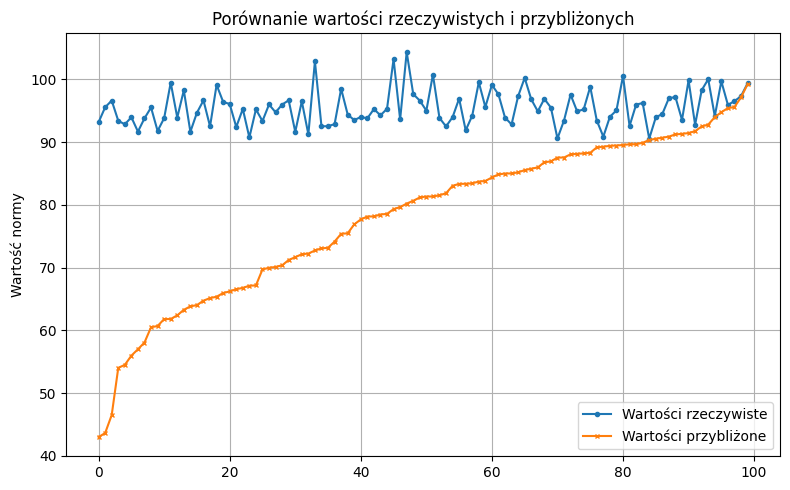

In [11]:
plot_real_and_approx_values(real_values, approximated_values)

In [ ]:
real_values = []
approximated_values = []

for _ in range(100):
    print(_)
    mat = create_random_matrix(100, 100)
    approx = matrix_norm_p(mat, 2)
    real = matrix_norm_2(mat)

    real_values.append(real.item())
    approximated_values.append(approx.detach().item())

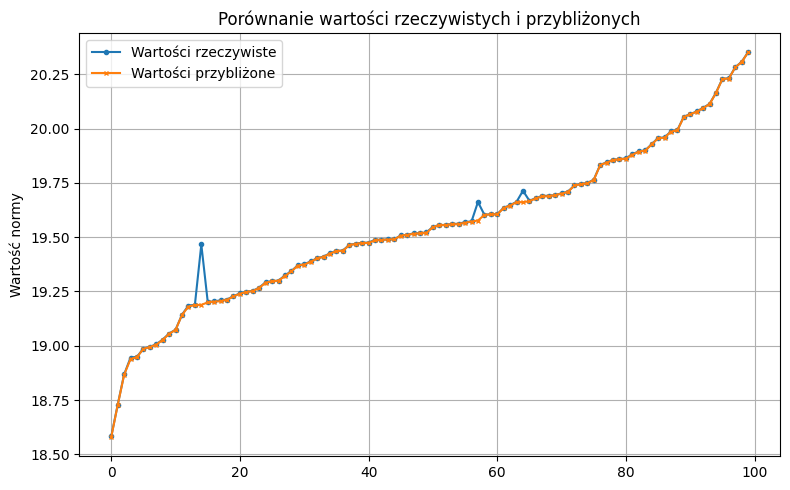

In [13]:
plot_real_and_approx_values(real_values, approximated_values)